# Asset Price

In [4]:
from pandas_datareader import DataReader
from datetime import datetime

In [5]:
FB = DataReader('FB',  'yahoo', datetime(2016,4,1), datetime(2019,9,1));

In [6]:
Close = FB['Close'].values;

In [7]:
len(FB['Close'])

861

In [8]:
len(FB['Open'])

861

In [9]:
Close

array([116.05999756, 112.55000305, 112.22000122, 113.70999908,
       113.63999939, 110.62999725, 108.98999786, 110.61000061,
       110.51000214, 110.83999634, 109.63999939, 110.44999695,
       112.29000092, 112.41999817, 113.44000244, 110.55999756,
       110.09999847, 108.76000214, 108.88999939, 116.73000336,
       117.58000183, 118.56999969, 117.43000031, 118.05999756,
       117.80999756, 119.48999786, 119.23999786, 120.5       ,
       119.51999664, 120.27999878, 119.80999756, 118.66999817,
       117.34999847, 117.65000153, 116.80999756, 117.34999847,
       115.97000122, 117.69999695, 117.88999939, 119.47000122,
       119.37999725, 118.80999756, 118.77999878, 118.93000031,
       118.47000122, 118.79000092, 117.76000214, 118.38999939,
       118.55999756, 116.62000275, 113.94999695, 114.94000244,
       114.59999847, 114.38999939, 113.01999664, 113.37000275,
       114.37999725, 113.91000366, 115.08000183, 112.08000183,
       108.97000122, 112.69999695, 114.16000366, 114.27

In [10]:
from matplotlib import pyplot as plt

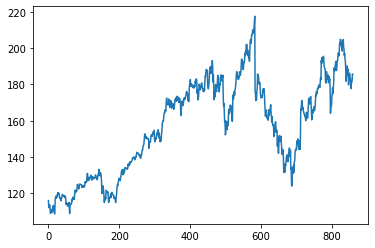

In [11]:
plt.plot(Close)

In [12]:
FB_daily_returns = FB['Close'].pct_change()

In [13]:
FB_daily_returns

Date
2016-04-01         NaN
2016-04-04   -0.030243
2016-04-05   -0.002932
2016-04-06    0.013277
2016-04-07   -0.000616
2016-04-08   -0.026487
2016-04-11   -0.014824
2016-04-12    0.014864
2016-04-13   -0.000904
2016-04-14    0.002986
2016-04-15   -0.010826
2016-04-18    0.007388
2016-04-19    0.016659
2016-04-20    0.001158
2016-04-21    0.009073
2016-04-22   -0.025388
2016-04-25   -0.004161
2016-04-26   -0.012171
2016-04-27    0.001195
2016-04-28    0.071999
2016-04-29    0.007282
2016-05-02    0.008420
2016-05-03   -0.009615
2016-05-04    0.005365
2016-05-05   -0.002118
2016-05-06    0.014260
2016-05-09   -0.002092
2016-05-10    0.010567
2016-05-11   -0.008133
2016-05-12    0.006359
                ...   
2019-07-22    0.019964
2019-07-23    0.000198
2019-07-24    0.011366
2019-07-25   -0.019300
2019-07-26   -0.004783
2019-07-29   -0.019074
2019-07-30    0.005614
2019-07-31   -0.014261
2019-08-01   -0.007723
2019-08-02   -0.019250
2019-08-05   -0.038567
2019-08-06    0.015297
2019-0

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


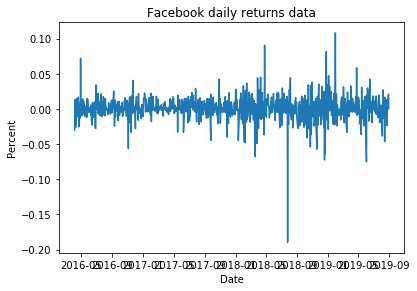

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(FB_daily_returns[1:])
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Facebook daily returns data")
plt.show()

# Karman Filter(Return)

In [15]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Optimization terminated successfully.
         Current function value: 4.371765
         Iterations: 2
         Function evaluations: 42
         Gradient evaluations: 7


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: OptimizeWarning: Unknown solver options: xtol


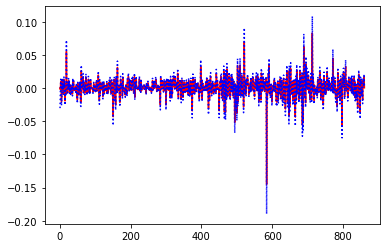

In [171]:
def Kalman_Filter(Y):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = param0[0]
 T = param0[1]
 H = param0[2]
 Q = param0[3]
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 KF_Dens = np.zeros(S)
 for s in range(1,S):
  if s == 1: 
    P_update[s] = 1000
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
  else: 
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
    v[s]=Y[s-1]-Z*u_predict[s-1]   
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]; 
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    KF_Dens[s] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(abs(F[s]))+(1/2)*np.transpose(v[s])*(1/F[s])*v[s]     
    Likelihood = np.sum(KF_Dens[1:-1])  
    return Likelihood


def Kalman_Smoother(params, Y):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = params[0]
 T = params[1]
 H = params[2]
 Q = params[3]
 
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 for s in range(1,S):
   if s == 1: 
    P_update[s] = 1000
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
   else: 
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
    v[s]=Y[s-1]-Z*u_predict[s-1]   
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]; 
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    u_smooth = np.zeros(S)
    P_smooth = np.zeros(S)
    u_smooth[S-1] = u_update[S-1]
    P_smooth[S-1] = P_update[S-1]    
 for  t in range(S-1,0,-1):
        u_smooth[t-1] = u_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]-T*u_update[t])
        P_smooth[t-1] = P_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_predict[t])/P_predict[t]*T*P_update[t]
 u_smooth = u_smooth[0:-1]
 return u_smooth

T = len(FB_daily_returns[1:])
Y = FB_daily_returns[1:]
param0 = np.array([1.3, 0.7, 0.8, 100])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)
timevec = np.linspace(1,T,T)
plt.plot(timevec, u,'r',timevec, Y,'b:')


In [172]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [173]:
rmse(u,Y)

0.00426517197744397

# Garch(Return)

         Current function value: -116.803649
         Iterations: 2
         Function evaluations: 150
         Gradient evaluations: 23


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: OptimizeWarning: Unknown solver options: xtol


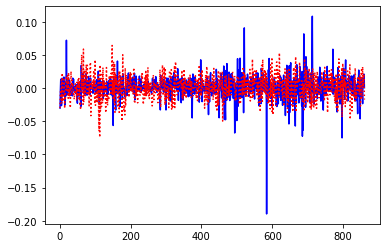

In [161]:
def GARCH(Y):
 "Initialize Params:"
 mu = param0[0]
 omega = param0[1]
 alpha = param0[2]
 beta = param0[3]
 T = Y.shape[0]
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
    Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood


def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.0001
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y    


Y = FB_daily_returns[1:]


param0 = np.array([np.mean(Y),0.0001, 0.2, 0.5])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')

In [162]:
rmse(Y_GARCH,Y)

0.024537158727873584

## Professionalism
50% Minghao Ru

50% Tong Yang


## Licensing
Copyright <2020> Minghao Ru, Tong Yang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.